In [1]:
# Most items in this notebook are defined in metadata.py around line 505
import os
import sys
import numpy as np
import cv2

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

Setting environment for Precision WorkStation for Alex Newberry


In [7]:
stack = 'DK18'
prep_id = 1
version = 'mask'
resol = 'thumbnail'

sec_to_fn_dict = DataManager.load_sorted_filenames(stack=stack)[1]

midpoint = int( np.mean( DataManager.load_sorted_filenames(stack=stack)[1].keys() ) )
max_distance = 25

# Only keeps sections within a max_distance of the midpoint
for i in sec_to_fn_dict.keys():
    try:
        if i not in range( midpoint-max_distance, midpoint+max_distance):
            del sec_to_fn_dict[i]
        if sec_to_fn_dict[i] == 'Placeholder':
            del sec_to_fn_dict[i]
    except KeyError:
        pass

In [8]:
# Get dimensions of the first image in the list (will be the same for all)
img_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=prep_id, 
                                        resol=resol, version=version, 
                                        fn=img_name)
height, width, channels = cv2.imread( img_fp ).shape
height_d16 = height/16
width_d16 = width/16

curr_rostral_lim_d16 = width_d16
curr_caudal_lim_d16 = 0 # 0
curr_dorsal_lim_d16 = height_d16
curr_ventral_lim_d16 = 0 # 0

#for img_name in sec_to_fn_dict.values():
#    img_fp = DataManager.get_image_filepath_v2(stack=stack, 
#                                               prep_id=prep_id, 
#                                               resol=resol,
#                                               version=version, 
#                                               fn=img_name)
    

In [9]:
for img_name in sec_to_fn_dict.values():
    # Get the image filepath and then load the image, downsampling
    # an additional 16x for speed
    img_fp = DataManager.get_image_filepath_v2(stack=stack, 
                                               prep_id=prep_id, 
                                               resol=resol,
                                               version=version, 
                                               fn=img_name)
    img_thumbnail_mask_down16 = cv2.imread( img_fp )[::16,::16]

    # update rostral lim
    for col_i in range( curr_rostral_lim_d16 ):
        col = img_thumbnail_mask_down16[ :, col_i]

        contains_tissue = np.array( col ).any()

        if contains_tissue:
            curr_rostral_lim_d16 = min( curr_rostral_lim_d16, col_i )
            break

    # update caudal lim
    caudal_range = range( curr_caudal_lim_d16, width_d16) 
    caudal_range.reverse() # Goes from right of image to left
    for col_i in caudal_range:
        col = img_thumbnail_mask_down16[ :, col_i]

        contains_tissue = np.array( col ).any()

        if contains_tissue:
            curr_caudal_lim_d16 = max( curr_caudal_lim_d16, col_i )
            break

    # update dorsal lim
    for row_i in range( curr_dorsal_lim_d16 ):
        row = img_thumbnail_mask_down16[ row_i, :]

        contains_tissue = np.array( row ).any()

        if contains_tissue:
            curr_dorsal_lim_d16 = min( curr_dorsal_lim_d16, row_i )
            break

    # update ventral lim
    ventral_range = range( curr_ventral_lim_d16, height_d16) 
    ventral_range.reverse() # Goes from right of image to left
    for row_i in ventral_range:
        row = img_thumbnail_mask_down16[ row_i, :]

        contains_tissue = np.array( row ).any()

        if contains_tissue:
            curr_ventral_lim_d16 = max( curr_ventral_lim_d16, row_i )
            break

final_rostral_lim = (curr_rostral_lim_d16-1)*16
final_caudal_lim = (curr_caudal_lim_d16-1)*16
final_dorsal_lim = (curr_dorsal_lim_d16-1)*16
final_ventral_lim = (curr_ventral_lim_d16-1)*16

print('rostral:',final_rostral_lim)
print('caudal:',final_caudal_lim)
print('dorsal:',final_dorsal_lim)
print('ventral:',final_ventral_lim)

('rostral:', 64)
('caudal:', 1888)
('dorsal:', 96)
('ventral:', 960)


In [11]:
stack

'DK18'

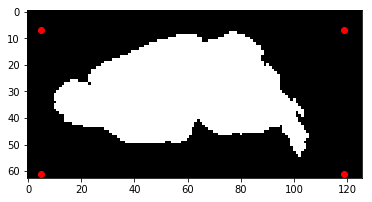

In [10]:
img_thumbnail_mask_down16 = cv2.imread( img_fp )[::16,::16]
plt.imshow( img_thumbnail_mask_down16 )
plt.scatter( [curr_rostral_lim_d16, curr_rostral_lim_d16, curr_caudal_lim_d16, curr_caudal_lim_d16],
           [curr_dorsal_lim_d16, curr_ventral_lim_d16, curr_dorsal_lim_d16, curr_ventral_lim_d16],
           c='r')

In [125]:
def get_prep5_limits_from_prep1_thumbnail_masks( stack, max_distance_to_scan_from_midpoint=25,
                                               plot_progression=False):
    prep_id = 1
    version = 'mask'
    resol = 'thumbnail'

    sec_to_fn_dict = DataManager.load_sorted_filenames(stack=stack)[1]

    midpoint = int( np.mean( DataManager.load_sorted_filenames(stack=stack)[1].keys() ) )
    max_distance = max_distance_to_scan_from_midpoint

    # Only keeps sections within a max_distance of the midpoint
    for i in sec_to_fn_dict.keys():
        try:
            if i not in range( midpoint-max_distance, midpoint+max_distance):
                del sec_to_fn_dict[i]
            if sec_to_fn_dict[i] == 'Placeholder':
                del sec_to_fn_dict[i]
        except KeyError:
            pass
        
    
    # Get dimensions of the first image in the list (will be the same for all)
    img_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=prep_id, 
                                            resol=resol, version=version, 
                                            fn=sec_to_fn_dict[sec_to_fn_dict.keys()[0]])
    height, width, channels = cv2.imread( img_fp ).shape
    height_d16 = height/16
    width_d16 = width/16

    curr_rostral_lim_d16 = width_d16
    curr_caudal_lim_d16 = 0
    curr_dorsal_lim_d16 = height_d16
    curr_ventral_lim_d16 = 0
    
    
    for img_name in sec_to_fn_dict.values():
        # Get the image filepath and then load the image, downsampling
        # an additional 16x for speed
        img_fp = DataManager.get_image_filepath_v2(stack=stack, 
                                                   prep_id=prep_id, 
                                                   resol=resol,
                                                   version=version, 
                                                   fn=img_name)
        img_thumbnail_mask_down16 = cv2.imread( img_fp )[::16,::16]

        # update rostral lim
        for col_i in range( curr_rostral_lim_d16 ):
            col = img_thumbnail_mask_down16[ :, col_i]

            contains_tissue = np.array( col ).any()

            if contains_tissue:
                curr_rostral_lim_d16 = min( curr_rostral_lim_d16, col_i )
                break

        # update caudal lim
        caudal_range = range( curr_caudal_lim_d16, width_d16) 
        caudal_range.reverse() # Goes from right of image to left
        for col_i in caudal_range:
            col = img_thumbnail_mask_down16[ :, col_i]

            contains_tissue = np.array( col ).any()

            if contains_tissue:
                curr_caudal_lim_d16 = max( curr_caudal_lim_d16, col_i )
                break

        # update dorsal lim
        for row_i in range( curr_dorsal_lim_d16 ):
            row = img_thumbnail_mask_down16[ row_i, :]

            contains_tissue = np.array( row ).any()

            if contains_tissue:
                curr_dorsal_lim_d16 = min( curr_dorsal_lim_d16, row_i )
                break

        # update ventral lim
        ventral_range = range( curr_ventral_lim_d16, height_d16) 
        ventral_range.reverse() # Goes from right of image to left
        for row_i in ventral_range:
            row = img_thumbnail_mask_down16[ row_i, :]

            contains_tissue = np.array( row ).any()

            if contains_tissue:
                curr_ventral_lim_d16 = max( curr_ventral_lim_d16, row_i )
                break
                
        if plot_progression:
            plt.imshow( img_thumbnail_mask_down16 )
            plt.scatter( [curr_rostral_lim_d16, curr_rostral_lim_d16, curr_caudal_lim_d16, curr_caudal_lim_d16],
               [curr_dorsal_lim_d16, curr_ventral_lim_d16, curr_dorsal_lim_d16, curr_ventral_lim_d16],
               c='r')
            plt.show()

    final_rostral_lim = (curr_rostral_lim_d16-1)*16
    final_caudal_lim = (curr_caudal_lim_d16-1)*16
    final_dorsal_lim = (curr_dorsal_lim_d16-1)*16
    final_ventral_lim = (curr_ventral_lim_d16-1)*16

    #print('rostral:',final_rostral_lim)
    #print('caudal:',final_caudal_lim)
    #print('dorsal:',final_dorsal_lim)
    #print('ventral:',final_ventral_lim)

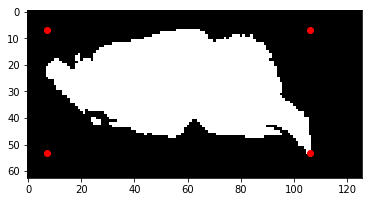

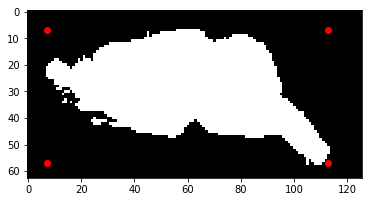

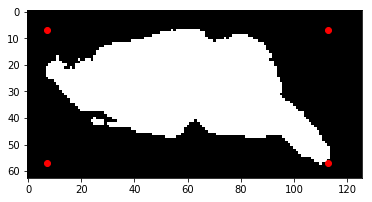

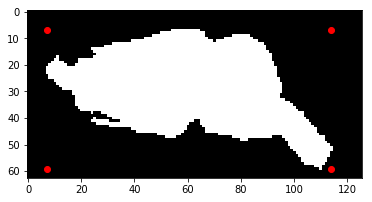

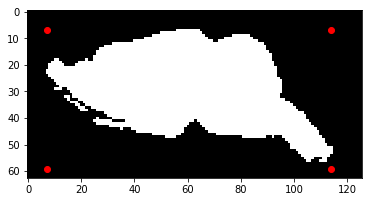

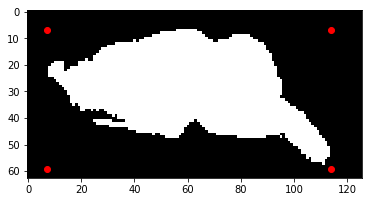

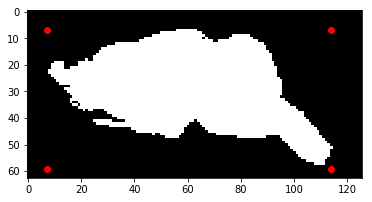

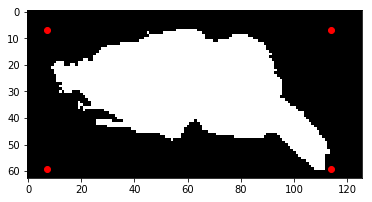

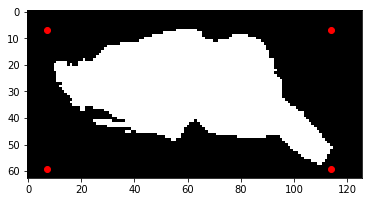

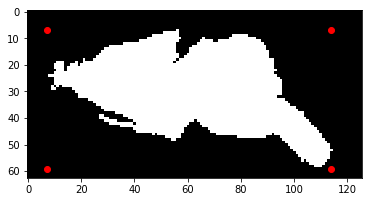

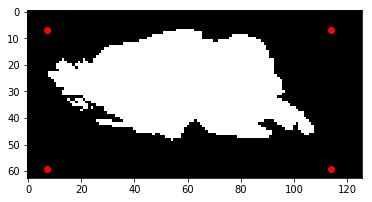

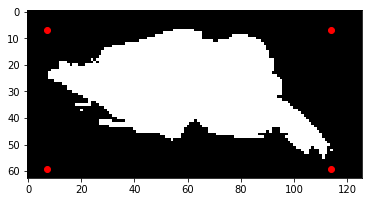

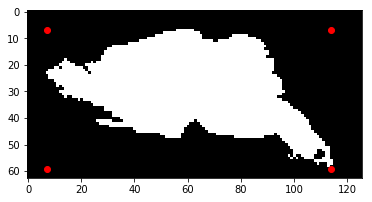

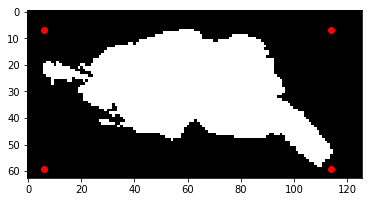

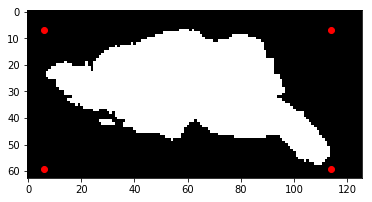

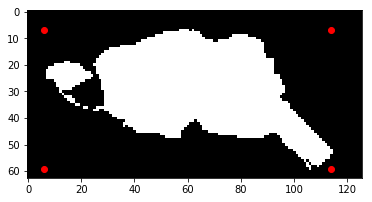

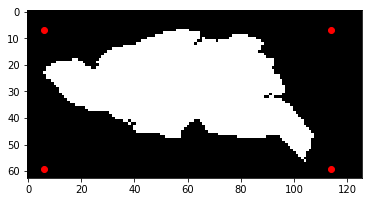

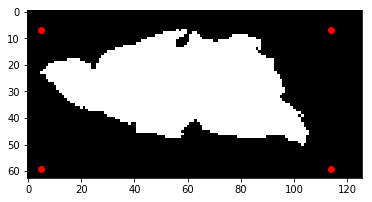

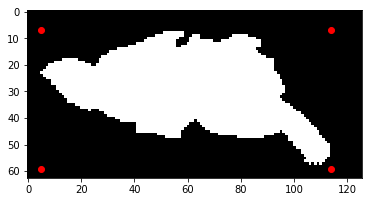

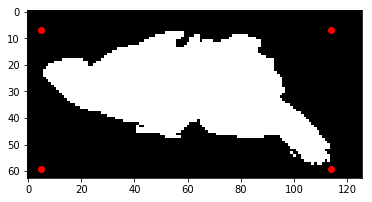

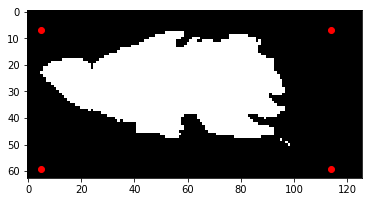

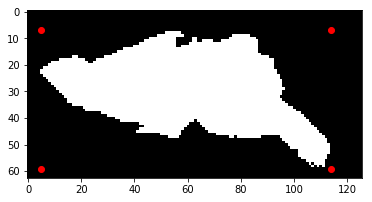

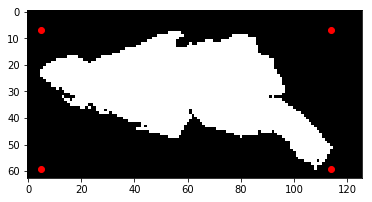

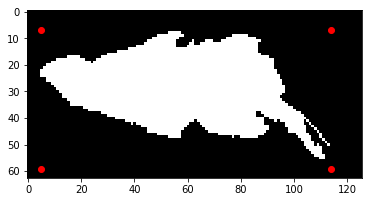

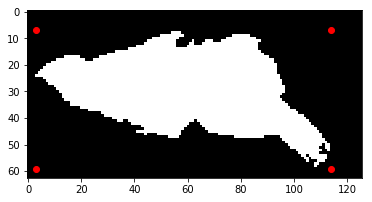

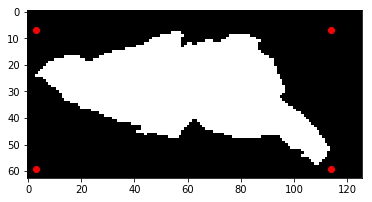

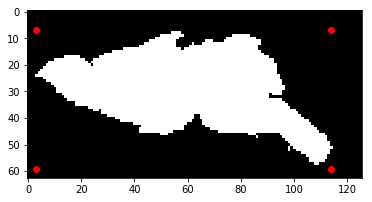

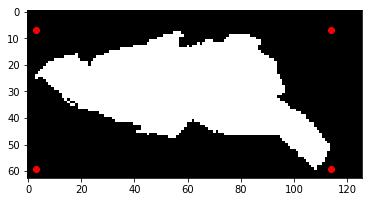

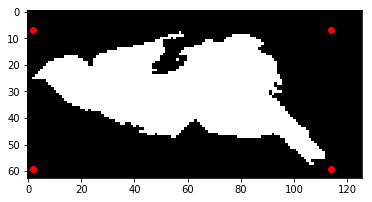

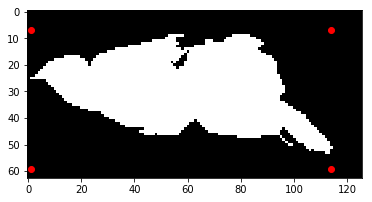

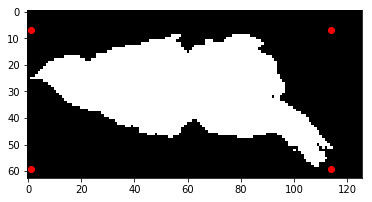

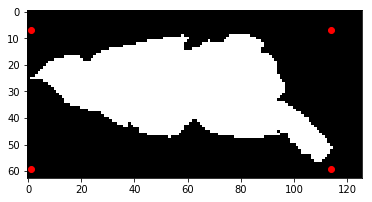

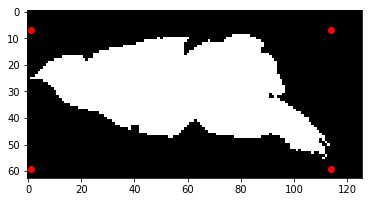

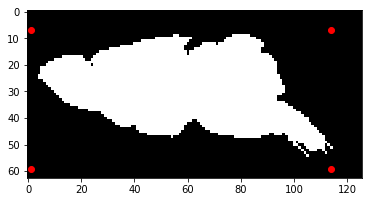

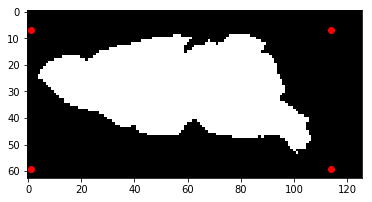

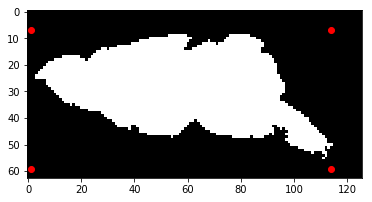

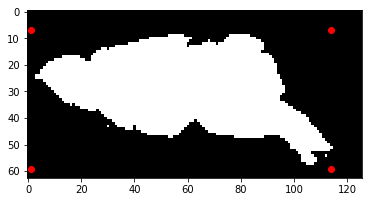

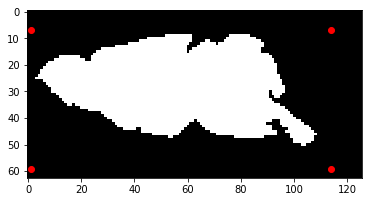

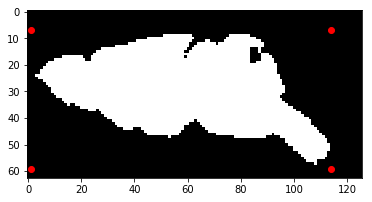

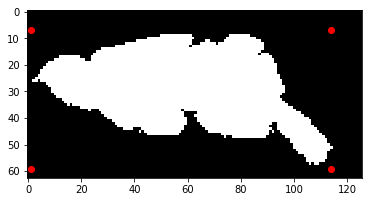

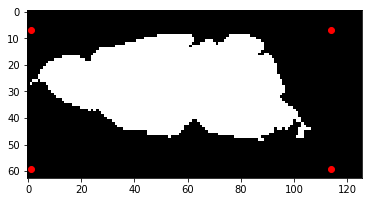

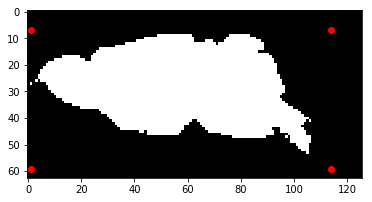

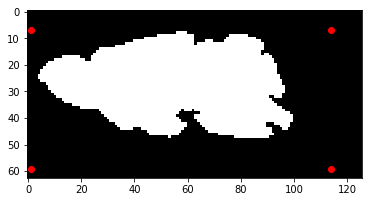

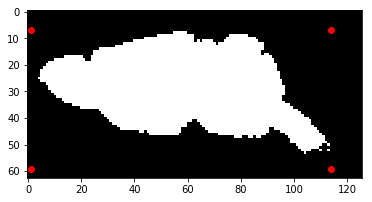

('rostral:', 0)
('caudal:', 1808)
('dorsal:', 96)
('ventral:', 928)


In [123]:
get_prep5_limits_from_prep1_thumbnail_masks('DK17', plot_progression=True)